#House Price Prediction using Linear Regression
This notebook implements a Linear Regression model to predict house prices using square footage, number of bedrooms, and number of bathrooms.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
# Load the datasets
train_df = pd.read_csv("C:/Users/Dell/Downloads/train.csv")
test_df = pd.read_csv("C:/Users/Dell/Downloads/test.csv")

train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [4]:
# Select features and target
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'

X = train_df[features]
y = train_df[target]

In [5]:
# Split into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Validation RMSE: 53018.32669198515


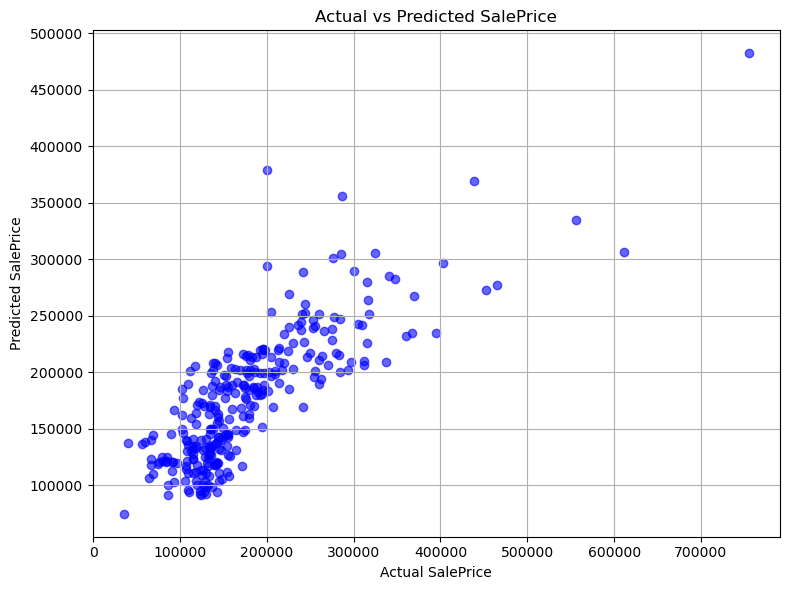

In [7]:
# Predict and evaluate
y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("Validation RMSE:", rmse)

# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_valid, y_pred, alpha=0.6, color='blue')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Predict on test data
X_test = test_df[features]
test_preds = model.predict(X_test)

In [9]:
# Create submission file
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_preds
})

submission.to_csv("submission.csv", index=False)
print("submission.csv file created successfully!")

submission.csv file created successfully!


In [12]:
# User input for prediction
print("House Price Prediction ")
try:
    sqft = float(input("Enter total square footage (GrLivArea): "))
    bedrooms = int(input("Enter number of bedrooms (BedroomAbvGr): "))
    full_bath = int(input("Enter number of full bathrooms (FullBath): "))
    half_bath = int(input("Enter number of half bathrooms (HalfBath): "))

    # Prepare input for model
    user_input = pd.DataFrame([[sqft, bedrooms, full_bath, half_bath]],
                              columns=['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath'])

    # Predict price
    predicted_price = model.predict(user_input)[0]
    print(f"\n Estimated House Price: $ {int(predicted_price):,}")
except Exception as e:
    print(" Invalid input:", e)


House Price Prediction 


Enter total square footage (GrLivArea):  1000
Enter number of bedrooms (BedroomAbvGr):  4
Enter number of full bathrooms (FullBath):  4
Enter number of half bathrooms (HalfBath):  4



 Estimated House Price: $ 189,585
